In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from tslearn.metrics import dtw
import datetime
#convert bunch of csvs into one, 
df = pd.concat(
    map(pd.read_csv, ['ekbatzol.csv', 'enilokmacy.csv','kesevguamy.csv','fecjavfec.csv','lihewcutw.csv','oreethecaw.csv']), ignore_index=True)
df.to_csv('csv')

#csv's with lots of beside.media traffic
#('crovereid.csv','ebabtivai.csv','lihewcutw.csv','scefunnu.csv','shwedvervi.csv','enilokmacy.csv','kesevguamy.csv','fecjavfec.csv','oreethecaw.csv','haddomyev.csv','prurkofbu.csv')

#use original csv data, I cant load the full csv file, maybe someone else can
og_data = pd.read_csv('csv',index_col = 'day', parse_dates = True)

#new data that was provided, has list of domains and dates created etc
data = pd.read_csv('jan26_domain_whois.csv',index_col = 'domain', parse_dates = True)

data.head()

#data.loc[data.dns_qdomainname == "beside.media"]


,created,updated,expires,whois
domain,,,,
*google.com,NaN,NaN,NaN,NaN
0-02.net,NaN,NaN,NaN,whois.namesilo.com
0-60specs.com,2014-03-17,2014-03-17,2023-03-17,whois.cloudflare.com
0-fel.se,2020-01-07,2020-01-07,2021-01-07,NaN
00-tv.com,2019-08-22,2019-08-22,2022-08-22,NaN


In [130]:
#organize data like in linear regression example
counts = og_data.pivot_table(values = 'num_clients',index = og_data.index.date,
                         columns = 'dns_qdomainname',
                         aggfunc=sum,
                         fill_value = 0)

In [131]:
#normalize data
counts.max().sort_values(ascending=False).to_csv('counts.csv')
counts = counts/counts.max()

In [132]:
#create domians by checking similairty to 2 anomalies
domains = []
dns = og_data.dns_qdomainname.unique()
similarity_slider = .7
#numba this
for i in range (len(dns)-1):
    val = dtw(counts['beside.media'],counts[dns[i]])
    if (val <= similarity_slider) & (dtw(counts['123w0w.com'],counts[dns[i]]) <= similarity_slider):
        domains.append(dns[i])

In [133]:
len(domains)

103494

In [134]:
#clear up some errors the dates
data['created'] = pd.to_datetime(data.created,format = '%Y/%m/%d',errors='ignore')

In [135]:
#function to test time between peak traffic and the creation of the domain
def timeBetween(d):
    created = data.loc[d].created
    peak = counts[d].idxmax()
    C_date = datetime.datetime.strptime(created, "%Y-%m-%d").date()
    diff = (C_date - peak).days
    return(abs(diff))

In [136]:
#create a list of suspect domains, selected from the domains that are at least a little similiar in shape to the 2 found anomalies
#these domains have less than a week between their creation and peak traffic, as well as have a similiar shape to 2 anomalies
#thus they are sus
sus = []
time_created_slider = 7
for i in domains:
    try:
        if (timeBetween(i) < time_created_slider ):
            sus.append(i)
    except TypeError:
        continue  
    

In [137]:
#Many dates are floats and not strings, not sure what to do about this other than ignore them
#float dates

#concentricdigital.com.au
#pumps-valves.eu
#vectant.ne.jp
#skrotrack.com
#seeclear.homes
#ppv.com.uy
#jorvia7.buzz
#nova1.net
#megansetyyoga.co.nz
#guam.gov
#s-pi.de
#neh.gov
#osac.gov
#webpub.net
#canyonstore.eu
#janofair.de
#domainoffensive.net
#colegioliceocorbi.es
#nationshield.ae
#laurelridge.edu
#pineng.com.my
#darkearthtactical.co.za
#bekia.es

#tried to remove them but quickly found out there are wayyyy too many to remove, just skip them in loop

# domains.remove('concentricdigital.com.au')
# domains.remove('pumps-valves.eu')
#domains.remove('vectant.ne.jp')
#domains.remove('skrotrack.com')
#domains.remove('seeclear.homes')
#domains.remove('ppv.com.uy')
#domains.remove('jorvia7.buzz')
#domains.remove('nova1.net')
#domains.remove('megansetyyoga.co.nz')
#domains.remove('guam.gov')
#domains.remove('s-pi.de')
#domains.remove('neh.gov')
#domains.remove('osac.gov')
#domains.remove('webpub.net')
#domains.remove('canyonstore.eu')
#domains.remove('janofair.de')
#domains.remove('domainoffensive.net')
#domains.remove('colegioliceocorbi.es')
#domains.remove('nationshield.ae')
#domains.remove('laurelridge.edu')
#domains.remove('pineng.com.my')
#domains.remove('darkearthtactical.co.za')
#domains.remove('bekia.es')
print(len(sus))
sus

994


['surgeryman.beauty',
 'grand-prize-add2.live',
 'oxinloss.beauty',
 '123w0w.com',
 'voicetranslet.beauty',
 'sensualsmiles.com',
 'quickfit.icu',
 'sonicxkimi.beauty',
 'erholdingthecollecti.xyz',
 'oluwagoziembig.com',
 'ladiathdefinishe.com',
 'distbarx.pics',
 'enhacedevice.beauty',
 'nerlimb.beauty',
 'moodflyhat.live',
 'nemgen.beauty',
 'diabdeep.beauty',
 'assetknowledgeregret.com',
 'dataaccesstech.online',
 'knifsurv.beauty',
 'solvingcue.com',
 'clearcardio007.beauty',
 'visionloes.beauty',
 'cadfixdisc.live',
 'russbri.beauty',
 'auiyerance.monster',
 'shedplan.beauty',
 'cleanbody.beauty',
 'chatsjobs.beauty',
 'matttt.beauty',
 'kniphako.beauty',
 'musclere.pics',
 'shedhos.mom',
 'kesxiong.link',
 'pwrground.beauty',
 'keragenispro.email',
 'fersmpieex.monster',
 'fuggelelo.beauty',
 'hardmal.mom',
 'knifesurv.beauty',
 'boostaros.rest',
 'fireeco.beauty',
 'janpanisknie.beauty',
 'hardli.beauty',
 'nernure.mom',
 'realestatesitepros.com',
 'cloud-basedstorage.com',
 'ro

<AxesSubplot:>

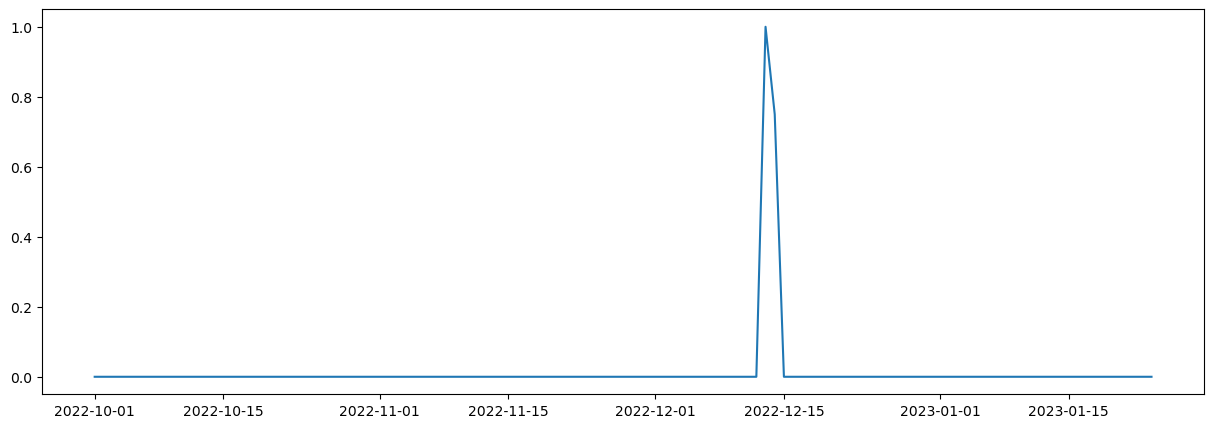

In [64]:
(counts['swabscorves.digital']).plot(figsize = (15,5))

<AxesSubplot:>

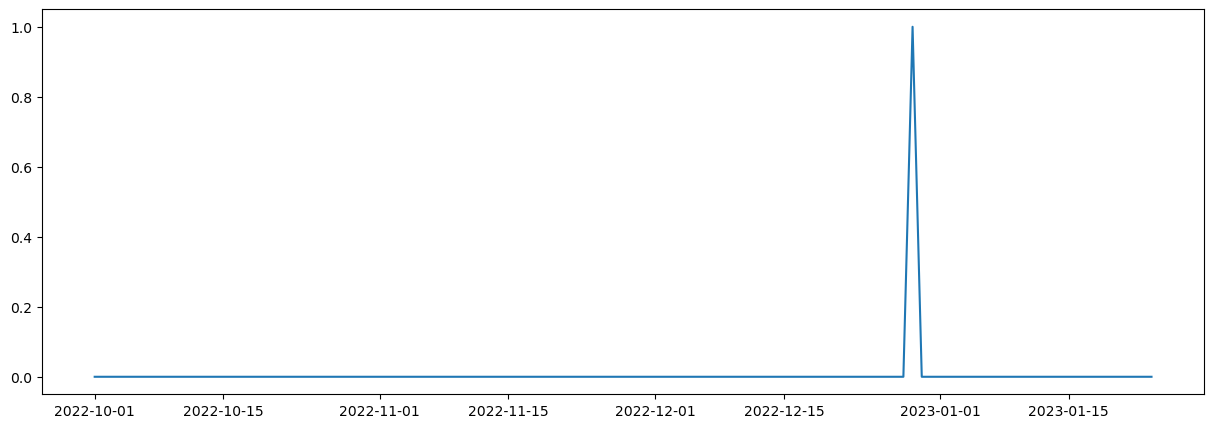

In [120]:
(counts['grand-prize-add2.live']).plot(figsize = (15,5))

'2023-01-18'

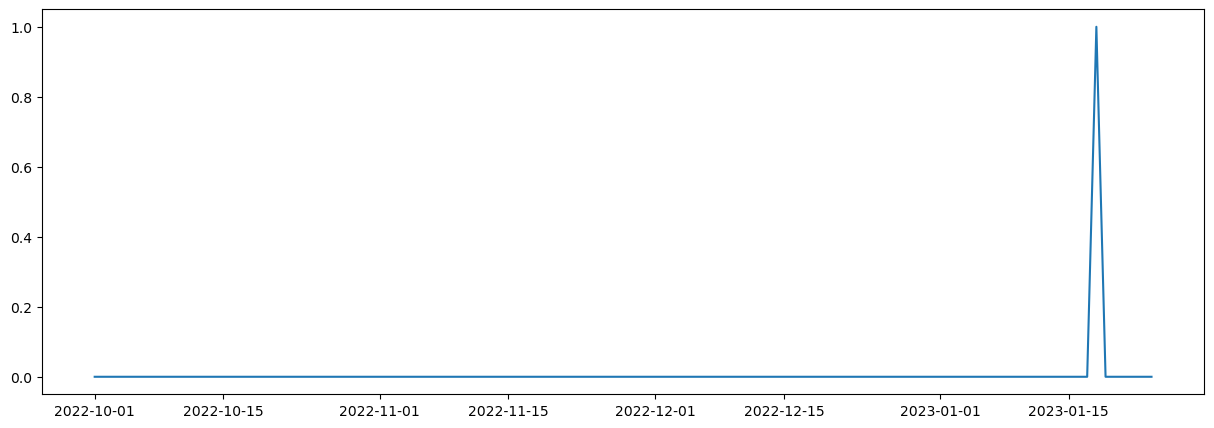

In [139]:
counts['an4by.xyz'].plot(figsize = (15,5))
data.loc['an4by.xyz'].created